In [1]:
import gzip
import math
import sklearn
import random
import numpy as np
import pandas as pd
import sklearn
from pandas import DataFrame
from sklearn import linear_model
from collections import defaultdict
from random import choice

In [2]:
import matplotlib.pyplot as plt

In [3]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        true=True
        false=False
        yield eval(l)

def readJSON(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [4]:
dataset_5core = readJSON('Digital_Music_5.json.gz')

In [5]:
user_5core=list(dataset_5core['reviewerID'])

In [6]:
dataset = readJSON("Digital_Music.json.gz")

In [7]:
dataset

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"12 22, 2013",A1ZCPG3D3HGRSS,0001388703,{'Format:': ' Audio CD'},mark l. massey,This is a great cd full of worship favorites!!...,Great worship cd,1387670400,NaN,NaN
1,5.0,True,"09 11, 2013",AC2PL52NKPL29,0001388703,{'Format:': ' Audio CD'},Norma Mushen,"So creative! Love his music - the words, the ...",Gotta listen to this!,1378857600,NaN,NaN
2,5.0,True,"03 2, 2013",A1SUZXBDZSDQ3A,0001388703,{'Format:': ' Audio CD'},Herbert W. Shurley,"Keith Green, gone far to early in his carreer,...",Great approach still gets the message out,1362182400,NaN,NaN
3,5.0,True,"12 2, 2012",A3A0W7FZXM0IZW,0001388703,{'Format:': ' Audio CD'},Mary M Raybell,Keith Green had his special comedy style of Ch...,Great A must have,1354406400,NaN,NaN
4,5.0,False,"01 7, 2012",A12R54MKO17TW0,0001388703,{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,1325894400,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1584077,5.0,True,"03 3, 2018",AR3KABMPL5L0O,B01HJ91P94,{'Format:': ' MP3 Music'},Shar Solis,Casting Crowns....you do it so well! Awesome s...,Awesome song!,1520035200,NaN,NaN
1584078,4.0,True,"01 24, 2018",A2N53GHW73INDH,B01HJ91P94,{'Format:': ' MP3 Music'},PEANUT,This band has produced many inspiring Christia...,This song in particular speaks about what it's...,1516752000,NaN,NaN
1584079,5.0,True,"04 21, 2017",ABNKLDCCVJKW1,B01HJ91P94,{'Format:': ' MP3 Music'},Alex,Awesome band and awesome song. This is my next...,Five Stars,1492732800,NaN,NaN
1584080,5.0,True,"02 23, 2018",AMWSDABZWFRAT,B01HJ91IVY,{'Format:': ' MP3 Music'},sara cabuag,Excellent,Five Stars,1519344000,NaN,NaN


In [7]:
data = dataset[['reviewerID','overall','asin']]

In [234]:
df4=dict(df3)
key_list = list(filter(lambda k: df4.get(k) == 1 , df4.keys()))

In [322]:
mostPopular = [(df4[x], x) for x in df4]
mostPopular[:5]

[(3411, 'B0135P6PZA'),
 (3243, 'B00M8JCW3E'),
 (2819, 'B00CZF8B68'),
 (2195, 'B00NPZI1ZS'),
 (2046, 'B00U3WJHCW')]

In [243]:
random.shuffle(key_list)
key=key_list[:10]

In [244]:
count=0
for i in key:
    if i in user_5core:count+=1
print(count)

0


In [262]:
df3 = data.asin.value_counts()
p=list(df3)

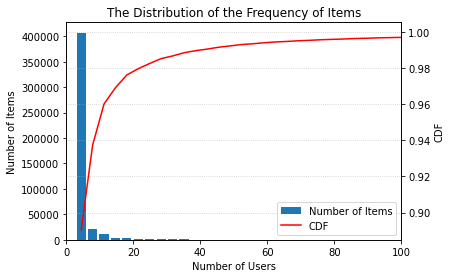

In [263]:
hist, bin_edges, = np.histogram(p, bins=1000)
width = (bin_edges[1] - bin_edges[0]) * 0.8

fig, ax1 = plt.subplots()
ax1.bar(bin_edges[1:], hist, width=width, label='Number of Items')
ax1.set_xlabel("Number of Users")
ax1.set_ylabel('Number of Items')

ax2 = ax1.twinx()
ax2.set_xlim([0,100])
cdf = np.cumsum(hist / sum(hist))
ax2.plot(bin_edges[1:], cdf, '-', label='CDF', c='r')
ax2.set_ylabel('CDF')
plt.grid(axis='y', alpha=0.7, linestyle=':')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='lower right')
plt.title('The Distribution of the Frequency of Items')
plt.savefig('item_freq.png',dpi=400,bbox_inches='tight')

In [366]:
df4 = pd.read_csv('U_I_R_rank.csv')
df5=pd.DataFrame(df4)

In [367]:
dfn = df5.reviewerID.value_counts()
t=list(dfn)
t.sort()
rev=defaultdict(int)
for i in t:
    rev[i]+=1
rev1=[rev[x] for x in rev]  

In [370]:
len(dfn)

3973

In [368]:
rev1.sort()
rev1[:5]

[1, 1, 1, 1, 1]

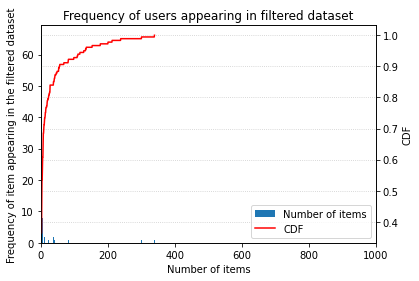

In [363]:
hist, bin_edges, = np.histogram(rev1, bins=500)
width = (bin_edges[1] - bin_edges[0]) * 0.8

fig, ax1 = plt.subplots()
ax1.bar(bin_edges[1:], hist, width=width, label='Number of items')
ax1.set_xlabel("Number of items")
ax1.set_ylabel('Frequency of item appearing in the filtered dataset')

ax2 = ax1.twinx()
ax2.set_xlim([0,1000])
cdf = np.cumsum(hist / sum(hist))
ax2.plot(bin_edges[1:], cdf, '-', label='CDF', c='r')
ax2.set_ylabel('CDF')
plt.grid(axis='y', alpha=0.7, linestyle=':')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='lower right')
plt.title('Frequency of users appearing in filtered dataset')
plt.savefig('fliterd_item_freq.png',dpi=400,bbox_inches='tight')

In [340]:
dfn = df5.asin.value_counts()
t=list(dfn)
t.sort()
asintime=defaultdict(int)
for i in t:
    asintime[i]+=1
asin1=[asintime[x] for x in asintime]  

In [349]:
asin1[0]

50086

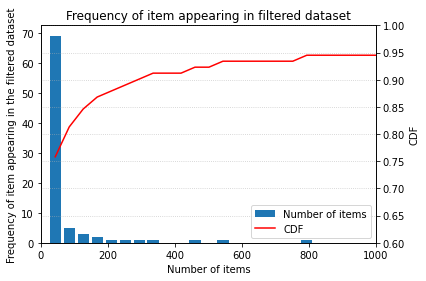

In [371]:
hist, bin_edges, = np.histogram(asin1, bins=1200)
width = (bin_edges[1] - bin_edges[0]) * 0.8

fig, ax1 = plt.subplots()
ax1.bar(bin_edges[1:], hist, width=width, label='Number of items')
ax1.set_xlabel("Number of items")
ax1.set_ylabel('Frequency of item appearing in the filtered dataset')

ax2 = ax1.twinx()
ax2.set_xlim([0,1000])
cdf = np.cumsum(hist / sum(hist))
ax2.plot(bin_edges[1:], cdf, '-', label='CDF', c='r')
ax2.set_ylabel('CDF')
ax2.set_ylim([0.6,1])
plt.grid(axis='y', alpha=0.7, linestyle=':')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='lower right')
plt.title('Frequency of item appearing in filtered dataset')
plt.savefig('fliterd_item_freq.png',dpi=400,bbox_inches='tight')

In [284]:
f=0
for i in asin:
    f+=i[1]
    rest=a-f
    if i[0]==5:
        print("more than 5 user",rest)
    if i[0]==10:
        print("more than 10 user",rest)
    if i[0]==15:
        print("more than 15 user",rest)
    if i[0]==20:
        print("more than 20 user",rest)

more than 5 user 40142
more than 10 user 19664
more than 15 user 13208
more than 20 user 9623


In [252]:
df2 = data.reviewerID.value_counts()

In [253]:
df2.name='times'
df2.index.name='reviewerID'

In [254]:
t=list(df2)

In [255]:
t=list(df2)
t.sort()
reviewtime=defaultdict(int)
for i in t:
    reviewtime[i]+=1
review=[(x,reviewtime[x]) for x in reviewtime] 

In [256]:
review[:10]

[(1, 602024),
 (2, 126315),
 (3, 43707),
 (4, 21785),
 (5, 12525),
 (6, 7774),
 (7, 5143),
 (8, 3799),
 (9, 2799),
 (10, 2205)]

In [259]:
X=list()
y=list()
user=list()
a=len(User)
b=0
for i in review:
    b +=(i[1]/a)
    c=[i[0]]+[b]
    X.append(i[0])
    y.append(i[1])
    user.append(c)

In [260]:
f=0
for i in review:
    f+=i[1]
    rest=a-f
    if i[0]==5:
        print("more than 5 items",rest)
    if i[0]==10:
        print("more than 10 items",rest)
    if i[0]==15:
        print("more than 15 items",rest)
    if i[0]==20:
        print("more than 20 items",rest)

more than 5 items 34016
more than 10 items 12296
more than 15 items 6571
more than 20 items 4086


In [27]:
df2[:5]

reviewerID
A3W4D8XOGLWUN5    1326
AQ4B80F0JSBNI      682
A1Q0BU32CVOLRA     638
A2WQY1B8ZS7QRZ     535
A2H3JURQZOHVMB     526
Name: times, dtype: int64

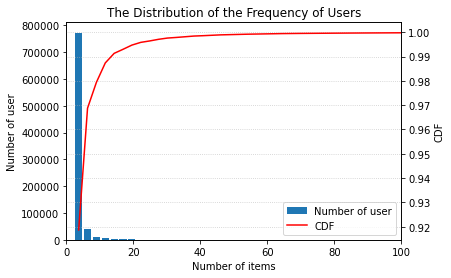

In [266]:
hist, bin_edges, = np.histogram(t, bins=500)
width = (bin_edges[1] - bin_edges[0]) * 0.8

fig, ax1 = plt.subplots()
ax1.bar(bin_edges[1:], hist, width=width, label='Number of user')
ax1.set_xlabel("Number of items")
ax1.set_ylabel('Number of user')

ax2 = ax1.twinx()
ax2.set_xlim([0,100])
cdf = np.cumsum(hist / sum(hist))
ax2.plot(bin_edges[1:], cdf, '-', label='CDF', c='r')
ax2.set_ylabel('CDF')
plt.grid(axis='y', alpha=0.7, linestyle=':')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='lower right')
plt.title('The Distribution of the Frequency of Users')
plt.savefig('user_freq.png',dpi=400,bbox_inches='tight')

In [103]:
data

,reviewerID,overall,asin
0,A1ZCPG3D3HGRSS,5.0,0001388703
1,AC2PL52NKPL29,5.0,0001388703
2,A1SUZXBDZSDQ3A,5.0,0001388703
3,A3A0W7FZXM0IZW,5.0,0001388703
4,A12R54MKO17TW0,5.0,0001388703
...,...,...,...
1584077,AR3KABMPL5L0O,5.0,B01HJ91P94
1584078,A2N53GHW73INDH,4.0,B01HJ91P94
1584079,ABNKLDCCVJKW1,5.0,B01HJ91P94
1584080,AMWSDABZWFRAT,5.0,B01HJ91IVY


In [112]:
# Split data 
trainset, valset, testset = np.split(data.sample(frac=1), [int(.66*len(data_U_I)), int(.83*len(data_U_I))])

In [95]:
train_user=trainset['reviewerID'].unique()

In [19]:
User = data['reviewerID'].unique()
Item = data['asin'].unique()

In [ ]:
len(User)

In [91]:
d=User[:500]

In [83]:
User[:5]

array(['A1ZCPG3D3HGRSS', 'AC2PL52NKPL29', 'A1SUZXBDZSDQ3A',
       'A3A0W7FZXM0IZW', 'A12R54MKO17TW0'], dtype=object)

In [70]:
A={'1':{'Format': 'Audio CD'},'2':{'Format': 'Audio CD'},'3':{'Format': 'Audio CD'}}
pd.DataFrame.from_dict(A)

,1,2,3
Format,Audio CD,Audio CD,Audio CD


In [79]:
data['style'][:5][1]['Format:']

' Audio CD'

In [298]:
ave_user=list()
for i in User:
    a=sum(ratingperuser[i]/len(ratingperuser[i]))
    ave_user.append(a)

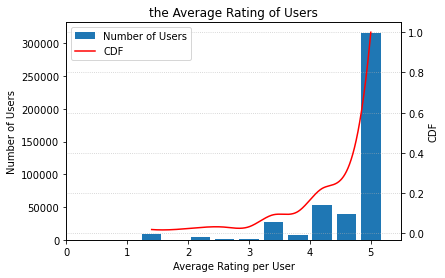

In [299]:
hist, bin_edges, = np.histogram(averagerating, bins=10)
width = (bin_edges[1] - bin_edges[0]) * 0.8

fig, ax1 = plt.subplots()
ax1.bar(bin_edges[1:], hist, width=width, label='Number of Users')
ax1.set_xlabel("Average Rating per User")
ax1.set_ylabel('Number of Users')

ax2 = ax1.twinx()
ax2.set_xlim([0,5.5])
cdf = np.cumsum(hist / sum(hist))
T=bin_edges[1:]
f1= interp1d(T,cdf,kind='cubic')
xnew = np.linspace(T.min(),T.max(),5000)
ax2.plot(xnew, f1(xnew), '-', label='CDF', c='r')
ax2.set_ylabel('CDF')
plt.grid(axis='y', alpha=0.7, linestyle=':')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='upper left')
plt.title('the Average Rating of Users')
plt.savefig('user_rating.png',dpi=400,bbox_inches='tight')

In [14]:
sum(ratingperItem[1])/len(ratingperItem[1])

3.25

In [21]:
from collections import Counter
averagerating=list()
for i in Item:
    a=sum(ratingperItem[i]/len(ratingperItem[i]))
    averagerating.append(a)

In [289]:
from scipy import interpolate 

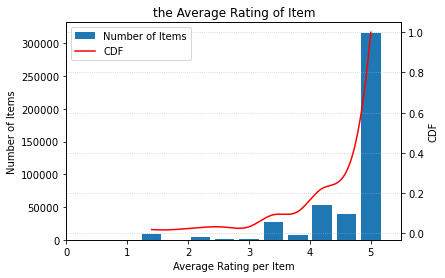

In [296]:
hist, bin_edges, = np.histogram(averagerating, bins=10)
width = (bin_edges[1] - bin_edges[0]) * 0.8

fig, ax1 = plt.subplots()
ax1.bar(bin_edges[1:], hist, width=width, label='Number of Items')
ax1.set_xlabel("Average Rating per Item")
ax1.set_ylabel('Number of Items')

ax2 = ax1.twinx()
ax2.set_xlim([0,5.5])
cdf = np.cumsum(hist / sum(hist))
T=bin_edges[1:]
f1= interp1d(T,cdf,kind='cubic')
xnew = np.linspace(T.min(),T.max(),5000)
ax2.plot(xnew, f1(xnew), '-', label='CDF', c='r')
ax2.set_ylabel('CDF')
plt.grid(axis='y', alpha=0.7, linestyle=':')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='upper left')
plt.title('the Average Rating of Item')
plt.savefig('item_rating.png',dpi=400,bbox_inches='tight')

In [227]:
X_train=list()
y_train=list()
totalBuy=0
return1 = set()
count = 0
itemCount = defaultdict(int)
for l in open('train.txt'):
    if l.startswith("reviewerID"):
        continue
    user,item,labels = l.strip().split(',')
    y_train=eval(labels)
    u_g=user+ '-' +item
    X_train.append(u_g)
    itemCount[item] += 1
    totalBuy += 1
print(len(X_train),totalBuy)    
mostPopular = [(itemCount[x], x) for x in itemCount]
mostPopular.sort()
mostPopular.reverse()    
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > 0.5*totalBuy:break
print(count,len(return1))

141758 141758
70880 13392


In [224]:
len(mostPopular)

78656

In [228]:
X_valid=list()
TP=0
TN=0
FP=0
FN=0
acc=0
predictions = defaultdict(int)
for l in open('test.txt'):
    if l.startswith("reviewerID"):
        continue
    user,item,labels = l.strip().split(',')
    y_valid=eval(labels)
    u_g=user+ '-' +item
    X_valid.append(u_g)
    if item in return1:
        predictions[u_g]=1
        count+=1
    else:
        predictions[u_g]=0  
    y_pred=predictions[u_g]
    if y_valid==y_pred:
        acc+=1
        if y_valid==1: TP+=1
        else: TN+=1
    else:
        if y_valid==0: FP+=1
        else: FN+=1
accuracy=acc/len(X_valid)
accuracy2=(TP+TN)/(TP+TN+FP+FN)
error=(FP+FN)/(TP+TN+FP+FN)
a=len(X_valid)-(TP+TN+FP+FN)
print("TP ",TP,"TN ",TN,accuracy,accuracy2)
print("FP ",FP,"FN ",FN,error)
print(a)

TP  15010 TN  32573 0.6394705012767101 0.6394705012767101
FP  4632 FN  22195 0.3605294987232899
0


In [306]:
X_valid[:5]

['A1JJP6UO6OQAZ3-B0000571L9',
 'A31KEFQBD3IK4G-B00BQ7EO6C',
 'A2MRABB6S0JGL8-B002LD5UFE',
 'AXB5TY20YJAB2-B00AR0RBT6',
 'A3RF0WE0Q5N3PJ-B000WLOKJ4']

In [380]:
#popularity
threshold=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy_all=list()
for j in threshold:
    return2 = set()
    count = 0
    acc=0
    for ic, i in mostPopular:
        count += ic
        return2.add(i)
        if count > j*totalBuy: break
     #predictions       
    predictions = defaultdict(int)
    X_valid=list()
    for l in open('test.txt'):
        if l.startswith("reviewerID"):continue
        user,item,labels = l.strip().split(',')
        y_valid=eval(labels)
        u_g=user+ '-' +item
        X_valid.append(u_g)
        if item in return2:
            predictions[u_g]=1
        else:
            predictions[u_g]=0  
        y_pred=predictions[u_g]
        if y_valid==y_pred:
            acc+=1
    valid_len=len(X_valid)
    accuracy=acc/valid_len
    accuracy_all.append(accuracy)
accuracy_all

[0.546163150114232,
 0.5847197957263809,
 0.6184786990995834,
 0.6388388657438516,
 0.6394705012767101,
 0.626474936164494,
 0.5772342427093132,
 0.5206961429915334,
 0.46899610267437175]

In [372]:
a=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [373]:
b=[0.5,0.5003,0.5005,0.5080,0.5529, 0.6219, 0.6324,0.5812,0.5276,0.5068,0.5]

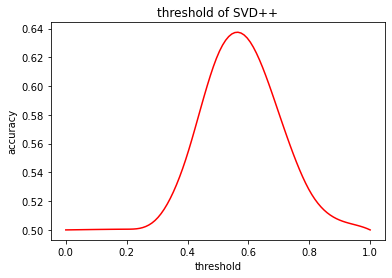

In [378]:
from scipy import interpolate 
f1= interpolate.interp1d(a,b,kind='cubic')
xnew = np.linspace(0,1,100)
plt.plot(xnew, f1(xnew), '-', label='threshold', c='r')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.title('threshold of SVD++')
plt.savefig('SVD++.png',dpi=400,bbox_inches='tight')

In [162]:
itemsPerUser = data.groupby(['reviewerID'])['asin'].unique()
usersPerItem = data.groupby(['asin'])['reviewerID'].unique()
user=data.reviewerID.unique()
Item=data.asin.unique()

In [132]:
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)
itemCount=defaultdict(int)
usercount=defaultdict(int)
count=0
for l in open('train.txt'):
    if l.startswith("reviewerID"):
        continue
    user,item,labels = l.strip().split(',')
    count+=1
    usersPerItem[item].add(user)
    itemsPerUser[user].add(item)
    itemCount[item]+=1
    usercount[user]+=1
print(count,len(usercount))

141758 6571


In [182]:
def Jaccard(s1, s2): #set()!!!
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

def mostSimilar(i):
    similarities = []
    users = set(usersPerItem[i])
    for i2 in usersPerItem: # For all items
        if i2 == i: continue # other than the query
        sim = Jaccard(users, set(usersPerItem[i2]))
        similarities.append((sim,i2))
    similarities.sort(reverse=True)
    return similarities[:10]

def mostSimilarFast(i):
    similarities = []
    users = set(usersPerItem[i])
    candidateItems = set()
    for u in users:
        candidateItems = candidateItems.union(set(itemsPerUser[u]))
    for i2 in candidateItems:
        if i2 == i: continue
        sim = Jaccard(users, set(usersPerItem[i2]))
        similarities.append((sim,i2))
    similarities.sort(reverse=True)
    return similarities[:10]

In [164]:
len(usersPerItem)

456992

In [183]:
mostSimilarFast('B000CQQXSU')

[(0.5, 'B00B4JTMVE'),
 (0.5, 'B0057R8ZIA'),
 (0.5, 'B003XEEP74'),
 (0.5, 'B00320RSH8'),
 (0.5, 'B002W84X2O'),
 (0.5, 'B001EW4H3O'),
 (0.5, 'B001DME0IM'),
 (0.5, 'B001A3WASG'),
 (0.5, 'B0013QUKBO'),
 (0.3333333333333333, 'B004JKKPY8')]

In [181]:
a=set(usersPerItem['B000CQQXSU'])
print(a)

{'A22U6SSRSCIE4V', 'A12R54MKO17TW0'}


In [179]:
b=set(itemsPerUser['A22U6SSRSCIE4V'])
p

In [180]:
Jaccard(a, b)

0.0

In [233]:
itemsPerUser1 = df_train.groupby(['reviewerID'])['asin'].unique()
usersPerItem1 = df_train.groupby(['asin'])['reviewerID'].unique()

In [219]:
values = [0,1]
a=random.choice(values)
print(a)

1


In [261]:
acc=0
X_valid=list()
y_valid=list()
jacar_sim=list()
for l in open('validation.txt'):
    if l.startswith("reviewerID"):continue
    user,item,labels = l.strip().split(',')
    u_g=user+ '-' +item
    X_valid.append(u_g)
    y_valid.append(eval(labels))
    simcom=0
    try:
        user1=set(usersPerItem1[item])
        g2=set(itemsPerUser1[user])
        for i in g2:
            if i == item: continue
            user2=set(usersPerItem1[i])
            sim=Jaccard(user1, user2)
            simcom+=sim
    except:
        values=[0,1]
        simcom=random.choice(values)
    simcom/len(g2)
    jacar_sim.append(simcom)

In [221]:
print(accuracy)

0.6254535680688079


In [271]:
acc=0
y2=list()
predictions=defaultdict(int)
for i in range(len(X_valid)):
    x=X_valid[i]
    y=y_valid[i]
    sim=jacar_sim[i]
    if sim<0.9:
        predictions[x]=0 
    else:
        predictions[x]=1
    y_pred=predictions[x]
    y2.append(y_pred)
    if y==y_pred:
        acc+=1 
accuracy=acc/len(X_valid)
print(accuracy)

0.5611476952022577


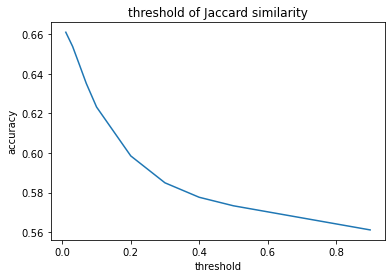

In [274]:
threshold=[0.01,0.03,0.05,0.07,0.1,0.2,0.3,0.4,0.5,0.9]
accracy1=[0.6610,0.6538,0.6445,0.6351,0.6232,0.5985,0.5849,0.5776,0.5733,0.5611]
plt.plot(threshold, accracy1)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.title('threshold of Jaccard similarity')
plt.savefig('similarity.png',dpi=400,bbox_inches='tight')

In [217]:
y2[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

In [243]:
jacar_sim[:10]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0029069767441860465,
 0.0,
 0.006802721088435374,
 0.0]

In [205]:
jacar_sim[:10]

[1, 0.0, 0.0, 1, 1, 0.0, 0.125, 0.0, 0.3333333333333333, 0.0]

In [155]:
cou=0
usex=list()
for j in item2:
    try:
        user1=usersPerItem[j]
        usex.append(use1)
    except:
        cou+=1
        continue
print(cou)

74410


In [146]:
len(X_valid)

74410

In [98]:
count=0
acc=0
X_valid=list()
y_valid=list()
jacar_sim=list()
for l in open('validation.txt'):
    if l.startswith("reviewerID"):continue
    user,item,labels = l.strip().split(',')
    u_g=user+ '-' +item
    X_valid.append(u_g)
    y_valid.append(eval(labels))
    simcou=0
    try: 
        sim=np.mean(mostSimilar(item))
        simcou+=1
    except:
        sim=0
    jacar_sim.append(sim)
print(simcou)

0


In [97]:
jacar_sim[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [197]:
df = pd.read_csv('U_I_R_t.csv')
df_train=pd.DataFrame(df)

In [198]:
df_train

,reviewerID,asin,overall
0,A12R54MKO17TW0,B001BHWEAA,3.0
1,A12R54MKO17TW0,B01929H4VM,5.0
2,A12R54MKO17TW0,B001PJ5SX4,4.0
3,A12R54MKO17TW0,B0045QJ7UO,4.0
4,A12R54MKO17TW0,B000CQQXSU,5.0
...,...,...,...
141753,A3MJPZOZZN14V5,B00NV759YG,5.0
141754,A3MJPZOZZN14V5,B00PL45RP8,5.0
141755,A3MJPZOZZN14V5,B00PL45Q3Q,5.0
141756,A3MJPZOZZN14V5,B00R9699RS,5.0


In [10]:
def rating_splitter(df):
    
    df['liked'] = np.where(df['overall']>=4, 1, 0)
    df['item'] = df['asin'].astype('str')
    gp_user_like = df.groupby(['liked', 'reviewerID'])

    return ([gp_user_like.get_group(gp)['asin'].tolist() for gp in gp_user_like.groups])

In [11]:
pd.options.mode.chained_assignment = None
splitted_items = rating_splitter(df_train)

In [57]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple gensim

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 24.2 MB 555 kB/s eta 0:00:01
     |████████████████████████████████| 117 kB 10.8 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108249 sha256=b1c11618362c41a4c349a4e1776170bfe0553f29718d9978a88232a7c48b4549
  Stored in directory: /Users/daisy/Library/Caches/pip/wheels/5f/d5/13/14376c8ad3870435736a4fe1d664922ceb74585dc4a7ca2462
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [12]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim
assert gensim.models.word2vec.FAST_VERSION > -1

In [13]:
from gensim.models import Word2Vec  #word2Vec model
import datetime
start = datetime.datetime.now()

model = Word2Vec(sentences = splitted_items, # We will supply the pre-processed list of moive lists to this parameter
                 iter = 50, # epoch
                 min_count = 1, # a movie has to appear more than 10 times to be keeped
                 size = 64, # size of the hidden layer
                 workers = 4, # specify the number of threads to be used for training
                 sg = 1, # Defines the training algorithm. We will use skip-gram so 1 is chosen.
                 hs = 0, # Set to 0, as we are applying negative sampling.
                 negative = 5, # If > 0, negative sampling will be used. We will use a value of 5.
                 window = 9999999)

print("Time passed: " + str(datetime.datetime.now()-start))
model.save('item2vec_50_64')

Time passed: 0:02:28.062570


In [383]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

from gensim.models import Word2Vec
model = Word2Vec.load('item2vec_50_64')
word_vectors = model.wv
vectors = model.wv.vectors
# del model # uncomment this line will delete the model

In [384]:
import json

In [37]:
i=itemsPerUser[u].tolist()
userperFea=dict()
for i in item_less:
    for p in i:
        vec=model.wv[p]
        item_vec[p]=vec.tolist()#array---list
print(type(item_vec))
json_str = json.dumps(item_vec) #dict--python
with open('item_vec3.json', 'w') as f:
    f.write(json_str) #item_vec3 10000 item_vec2 1000

21

In [390]:
user=df_train['reviewerID'].unique().tolist()
itemsPerUser = df_train.groupby(['reviewerID'])['asin'].unique()
random.shuffle(user)
item_less=list()
a=0
for u in user[:100]:
    pq=itemsPerUser[u].tolist()
    item_less.append(pq)
    a+=1
print(a)
cou=0
item_vec=dict()
for j in user[:100]:
    cou+=1
    for p in itemsPerUser[j].tolist():
        user2.append(j)
for i in item_less:
    for q in i:
        vec=model.wv[q]
        item_vec[q]=vec.tolist()#array---list
print(type(item_vec))
json_str = json.dumps(item_vec) #dict--python
with open('u_i_vec2.json', 'w') as f:
    f.write(json_str) #u_item_vec 10000 item_vec2 1000

100
<class 'dict'>


In [391]:
cou=0
user2=list()
for j in user[:100]:
    cou+=1
    for p in itemsPerUser[j].tolist():
        user2.append(cou)

In [392]:
labels=pd.Series(user2)
labels.name='label'
labels.index.name='index'

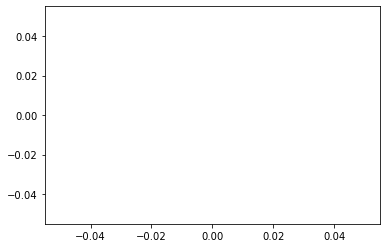

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

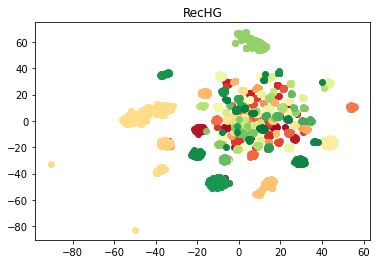

In [395]:
from sklearn.manifold import TSNE
import datetime
start = datetime.datetime.now()

SEED=4321
with open('u_i_vec2.json', 'r') as rf:
    data = json.load(rf)
    
tsne = TSNE(random_state=SEED,perplexity=30)
tsne.fit_transform(list(data.values()))
tsne_emb = pd.DataFrame(tsne.embedding_)
data = pd.DataFrame(tsne_emb, index=tsne_emb.index)
data = pd.merge(tsne_emb, labels, right_index=True, left_index=True)

norm = plt.Normalize(1, max(labels))
colors = ['b', 'r', 'g', 'cyan']
plt.scatter(data[data.label == l].iloc[:, 0], data[data.label == l].iloc[:, 1])
plt.show()
for l in set(labels):
    plt.scatter(data[data.label == l].iloc[:, 0], data[data.label == l].iloc[:, 1], c=plt.cm.RdYlGn(norm(l)))
    #plt.scatter(data[data.label == l].iloc[:, 0], data[data.label == l].iloc[:, 1], c=colors[l%len(colors)])
plt.title('item_vector')
plt.savefig('u_i_vec2.png',dpi=400,bbox_inches='tight')
plt.show()

              0          1
0    -22.311054  16.581659
1    -22.378469  16.665117
2    -22.050034  15.765316
3    -21.360521  15.235837
4    -21.419687  16.979202
...         ...        ...
1856 -13.595950  10.347103
1857 -14.458181  11.338656
1858 -13.594408  10.359414
1859 -13.445131  10.091555
1860 -12.759029  11.777369

[1861 rows x 2 columns]
Time passed: 0:00:33.705056


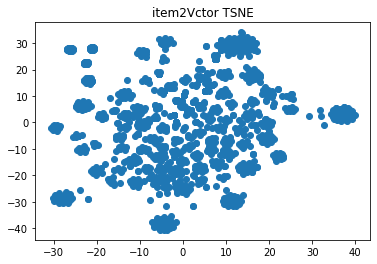

In [318]:
from sklearn.manifold import TSNE
import datetime
start = datetime.datetime.now()

SEED=4321
with open('u_i_vec2.json', 'r') as rf:
    data = json.load(rf)

tsne = TSNE(random_state=SEED,perplexity=50)
tsne.fit_transform(list(data.values()))
tsne_emb = pd.DataFrame(tsne.embedding_)
#print(list(data.values()))
print(tsne_emb)
fig, ax = plt.subplots()
plt.scatter(tsne_emb.iloc[:, 0], tsne_emb.iloc[:, 1])
#map_size = {-1: 50, 1: 100}
#size = list(map(lambda x: map_size[x]))
#map_color = {-1: 'r', 1: 'g'}
#color = list(map(lambda x: map_color[x]))
#plt.scatter(tsne_emb.iloc[:, 0], tsne_emb.iloc[:, 1],s=size, c=color, marker='o')
plt.title('item2Vctor TSNE')
plt.savefig('i2v3_70.png',dpi=400,bbox_inches='tight')
print("Time passed: " + str(datetime.datetime.now()-start))
plt.show()

In [210]:
average=np.mean(vectors,axis=0)
model_word_vector = np.array( average, dtype='f')
topn = 1;
most_similar_words = model.most_similar( [ model_word_vector ], [], topn)
print(most_similar_words)

[('B004N1PHR8', 0.9998778104782104)]


<ipython-input-210-3707daba7acd>:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  most_similar_words = model.most_similar( [ model_word_vector ], [], topn)


In [205]:
words = model.wv.vocab
vocab=list()
for word in words:
    vocab.append(word)
print(len(vocab))

78656


In [131]:
model.most_similar('B0000571L9')

<ipython-input-131-9bf1df65281f>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('B0000571L9')


[('B00110MH72', 0.999814510345459),
 ('B000057GN4', 0.9997575283050537),
 ('B000X7EQ64', 0.9997566938400269),
 ('B00006ZY5G', 0.9997544288635254),
 ('B0014OAKE2', 0.9997532367706299),
 ('B0000082Z5', 0.9996815323829651),
 ('B001DLUFBY', 0.9996392726898193),
 ('B001JBOZ8C', 0.9996380805969238),
 ('B000050X70', 0.9995995163917542),
 ('B00006AWLU', 0.9995852112770081)]

In [188]:
df = pd.read_csv('train.csv')
df_train=pd.DataFrame(df)
itemsPerUser = df_train.groupby(['reviewerID'])['asin'].unique()
usersPerItem = df_train.groupby(['asin'])['reviewerID'].unique()

In [155]:
itemsPerUser['A20W95ZB4ZP5N']

array(['B00A7ZXBE0', 'B002M9HYWO', 'B00137YZ6Y', 'B00PGO7LLQ',
       'B00PGO7O7C', 'B017JGRPEG', 'B0170K9XVY', 'B001HE0K4E',
       'B01F49DZEO', 'B013D1FONK', 'B000TDUTVS', 'B000V6309Q',
       'B00DAKW8R0', 'B00136LEN2', 'B001CJO0UO'], dtype=object)

In [209]:
item='B001BHWEAA'
sim_df=0
sim_a=list()
for i in itemsPerUser['A20W95ZB4ZP5N']:
    try:
        sim=model.wv.similarity(item,i)
        sim_a.append(sim)
    except:
        for j in most_similar_words:
            sim=model.wv.similarity(item,j)
            if sim>sim_df:sim_df=sim
        sim_a.append(sim_df)
print(sim_a)

[0.6933753, 0.95699537, 0.98586166, 0.9891305, 0.90032375, 0.8153026, 0.8593405, 0.9766029, 0.7187065, 0.98269606, 0.7721154, 0.8988353, 0.9817128, 0.8882172, 0.747551]


In [373]:
mostPopular[0]

(173, 'B00CZF8B68')

In [388]:
popular=defaultdict(int)
for ic, i in mostPopular:
    popular[i]=(ic/173)
popu = [(popular[x], x) for x in popular]

In [387]:
pop[0]

1.0

In [424]:
import datetime
start = datetime.datetime.now()
count=0
acc=0
X_valid=list()
y_valid=list()
log4=list()
average=np.mean(vectors,axis=0)
for l in open('validation.txt'):
    if l.startswith("reviewerID"):continue
    user,item,labels = l.strip().split(',')
    y_valid.append(eval(labels))
    u_g=user+ '-' +item
    X_valid.append(u_g)
    i1=itemsPerUser[user]
    itemvec=list()
    for i in i1:
        if i == item: continue
        try: 
            a=model.wv[i]
        except:
            continue
        itemvec.append(a)
    ave_u=np.mean(itemvec,axis=0)
    try:
        v_i=model.wv[item]
    except:
        v_i=average
    t=list()
    for j in range(128):
        t.append((ave_u[j])*(v_i[j]))
    log4.append(t)

In [57]:
np.mean(vectors,axis=0)

array([ 0.7106348 , -0.12102143,  0.2691203 , -0.00738406,  0.44835487,
       -0.22573155,  0.1939816 ,  0.27583912,  0.2645499 ,  0.13793977,
        0.2170539 ,  0.12642863,  0.5422195 ,  0.00755428, -0.34260336,
        0.3365299 , -0.22954515, -0.21446395,  0.20327424, -0.14073959,
       -0.25179642, -0.31014276,  0.304879  , -0.1713297 ,  0.11389879,
        0.08917502,  0.17166092, -0.15822221, -0.41278887, -0.17568476,
        0.4372309 , -0.25046068, -0.45742184,  0.12654759, -0.40733477,
        0.11407173,  0.56558514,  0.04810303, -0.02474195,  0.19665383,
       -0.03269894, -0.3806963 , -0.01779208, -0.78719324,  0.00442194,
       -0.28036034,  0.42827708,  0.33076665,  0.40050998, -0.65524477,
        0.11828678,  0.0663376 ,  0.45445892, -0.27290204,  0.5206784 ,
       -0.1468348 ,  0.12619413, -0.0402521 , -0.30691376, -0.2323477 ,
       -0.04268986, -0.33931565,  0.22618012,  0.07982506], dtype=float32)

In [425]:
mod7= linear_model.LogisticRegression(C=1, class_weight='balanced')
mod7.fit(log4, y_valid)

LogisticRegression(C=1, class_weight='balanced')

In [426]:
count=0
acc=0
X_test=list() #modify size=64， iter 100
y_test=list()
feature4=list()
average=np.mean(vectors,axis=0)
for l in open('test.txt'):
    if l.startswith("reviewerID"):continue
    user,item,labels = l.strip().split(',')
    y_test.append(eval(labels))
    u_g=user+ '-' +item
    X_test.append(u_g)
    i1=itemsPerUser[user]
    itemvec=list()
    for i in i1:
        if i == item: continue
        try: 
            a=model.wv[i]
        except:
            continue
        itemvec.append(a)
    ave_u=np.mean(itemvec,axis=0)
    try:
        v_i=model.wv[item]
    except:
        v_i=average
    t=list()
    for j in range(128):
        t.append((ave_u[j])*(v_i[j]))
    feature4.append(t)

In [427]:
#modify size=128， iter 50
pred4 = mod7.predict(feature4)
sum(pred4 == y_test) / len(y_test)

0.6635801639564575

In [416]:
pred4 = mod7.predict(feature4)
sum(pred4 == y_test) / len(y_test)  #modify size=64， iter 100

0.6549388523047978

In [406]:
import datetime
start = datetime.datetime.now()
count=0
acc=0
X_valid=list()
y_valid=list()
log3=list()
average=np.mean(vectors,axis=0)
for l in open('validation.txt'):
    if l.startswith("reviewerID"):continue
    user,item,labels = l.strip().split(',')
    y_valid.append(eval(labels))
    u_g=user+ '-' +item
    X_valid.append(u_g)
    i1=itemsPerUser[user]
    itemvec=list()
    for i in i1:
        if i == item: continue
        try: 
            a=model.wv[i]
        except:
            continue
        itemvec.append(a)
    ave_u=np.mean(itemvec,axis=0)
    try:
        v_i=model.wv[item]
    except:
        v_i=average
    t=list()
    for j in range(64):
        t.append((ave_u[j])*(v_i[j]))
    log3.append(t)

In [407]:
mod6= linear_model.LogisticRegression(C=1, class_weight='balanced')
mod6.fit(log3, y_valid)

LogisticRegression(C=1, class_weight='balanced')

In [409]:
count=0
acc=0
X_test=list()
y_test=list()
feature3=list()
average=np.mean(vectors,axis=0)
for l in open('test.txt'):
    if l.startswith("reviewerID"):continue
    user,item,labels = l.strip().split(',')
    y_test.append(eval(labels))
    u_g=user+ '-' +item
    X_test.append(u_g)
    i1=itemsPerUser[user]
    itemvec=list()
    for i in i1:
        if i == item: continue
        try: 
            a=model.wv[i]      #modify size=64， iter 50
        except:
            continue
        itemvec.append(a)
    ave_u=np.mean(itemvec,axis=0)
    try:
        v_i=model.wv[item]
    except:
        v_i=average
    t=list()
    for j in range(64):
        t.append((ave_u[j])*(v_i[j]))
    feature3.append(t)

In [410]:
pred3 = mod6.predict(feature3)
sum(pred3 == y_test) / len(y_test)

0.663150114231958

In [399]:
import datetime
start = datetime.datetime.now()
count=0
acc=0
X_valid=list()
y_valid=list()
log2=list()
average=np.mean(vectors,axis=0)
for l in open('validation.txt'):
    if l.startswith("reviewerID"):continue
    user,item,labels = l.strip().split(',')
    y_valid.append(eval(labels))
    u_g=user+ '-' +item
    X_valid.append(u_g)
    i1=itemsPerUser[user]
    itemvec=list()
    for i in i1:
        if i == item: continue
        try: 
            a=model.wv[i]
        except:
            continue
        itemvec.append(a)
    ave_u=np.mean(itemvec,axis=0)
    try:
        v_i=model.wv[item]
    except:
        v_i=average
    t=list()
    for j in range(200):
        t.append((ave_u[j])*(v_i[j]))
    log2.append(t)

In [400]:
mod5= linear_model.LogisticRegression(C=1, class_weight='balanced')
mod5.fit(log2, y_valid)

LogisticRegression(C=1, class_weight='balanced')

In [401]:
count=0
acc=0
X_test=list()
y_test=list()
feature2=list()
average=np.mean(vectors,axis=0)
for l in open('test.txt'):
    if l.startswith("reviewerID"):continue
    user,item,labels = l.strip().split(',')
    y_test.append(eval(labels))
    u_g=user+ '-' +item
    X_test.append(u_g)
    i1=itemsPerUser[user]  #modify size=， iter 50
    itemvec=list()
    for i in i1:
        if i == item: continue
        try: 
            a=model.wv[i]
        except:
            continue
        itemvec.append(a)
    ave_u=np.mean(itemvec,axis=0)
    try:
        v_i=model.wv[item]
    except:
        v_i=average
    t=list()
    for j in range(200):
        t.append((ave_u[j])*(v_i[j]))
    feature2.append(t)

In [402]:
pred2 = mod5.predict(feature2)
sum(pred2 == y_test) / len(y_test)

0.6656900954172826

In [353]:
import datetime
start = datetime.datetime.now()
count=0
acc=0
X_valid=list()
y_valid=list()
log=list()
average=np.mean(vectors,axis=0)
for l in open('validation.txt'):
    if l.startswith("reviewerID"):continue
    user,item,labels = l.strip().split(',')
    y_valid.append(eval(labels))
    u_g=user+ '-' +item
    X_valid.append(u_g)
    i1=itemsPerUser[user]
    itemvec=list()
    for i in i1:
        if i == item: continue
        try: 
            a=model.wv[i]
        except:
            continue
        itemvec.append(a)
    ave_u=np.mean(itemvec,axis=0)
    try:
        v_i=model.wv[item]
    except:
        v_i=average
    t=list()
    for j in range(200):
        t.append((ave_u[j])*(v_i[j]))
    log.append(t)

In [380]:
a=[[1,2,3],[4,5,6]]
b=[2,3]
q=list()
for i in range(len(log)):
    q.append(log[i]+[b[1]])
q

[[1, 2, 3, 3], [4, 5, 6, 3]]

In [366]:
mod4= linear_model.LogisticRegression(C=1, class_weight='balanced')
mod4.fit(log, y_valid)

LogisticRegression(C=1, class_weight='balanced')

In [355]:
count=0
acc=0
X_test=list()
y_test=list()
feature=list()
average=np.mean(vectors,axis=0)
for l in open('test.txt'):
    if l.startswith("reviewerID"):continue
    user,item,labels = l.strip().split(',')
    y_test.append(eval(labels))
    u_g=user+ '-' +item
    X_test.append(u_g)
    i1=itemsPerUser[user]
    itemvec=list()
    for i in i1:
        if i == item: continue
        try: 
            a=model.wv[i]
        except:
            continue
        itemvec.append(a)
    ave_u=np.mean(itemvec,axis=0)
    try:
        v_i=model.wv[item]
    except:
        v_i=average
    t=list()
    for j in range(200):
        t.append((ave_u[j])*(v_i[j]))
    feature.append(t)

In [367]:
pred = mod4.predict(feature)

TP_ = np.logical_and(pred, y_test)
FP_ = np.logical_and(pred, np.logical_not(y_test))
TN_ = np.logical_and(np.logical_not(pred), np.logical_not(y_test))
FN_ = np.logical_and(np.logical_not(pred), y_test)
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)
# BER
1 - 0.5*(TP / (TP + FN) + TN / (TN + FP))

0.3593603010348071

In [368]:
sum(pred == y_test) / len(y_test)

0.6406396989651929

In [358]:
y_test[:10]

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [312]:
simlist[:10]

[0,
 0.97971135,
 0.93317324,
 0,
 0,
 0.9685426,
 0.98925793,
 0.989896,
 0.8733214,
 0.99685955]

In [335]:
import datetime
start = datetime.datetime.now()
count=0
acc=0
X_valid=list()
y_valid=list()
simlist2=list()
for l in open('validation.txt'):
    if l.startswith("reviewerID"):continue
    user,item,labels = l.strip().split(',')
    u_g=user+ '-' +item
    X_valid.append(u_g)
    y_valid.append(eval(labels))
    i1=itemsPerUser[user]
    simcou=0
    i2=list()
    for i in i1:
        if i == item: continue
        try: 
            sim=model.wv.similarity(item,i)
        except:
            sim=0
        simcou+=sim
    simcou=simcou/len(i1)
    simlist2.append(simcou)

In [336]:
simlist2[:10]

[0.0,
 0.959979797110838,
 0.6658743760652013,
 0.0,
 0.0,
 0.7196790944962275,
 0.9291892356650774,
 0.9871587802966436,
 0.745631777510351,
 0.9666494131088257]

In [326]:
y=list()
for l in open('validation.txt'):
    if l.startswith("reviewerID"):continue
    user,item,labels = l.strip().split(',')
    y_valid=eval(labels)
    y.append(y_valid)

In [331]:
len(y_valid)/len(X_valid)

1.0

In [342]:
predictions_df = defaultdict(int)
count=0
acc=0
TP=0
TN=0
FN=0
FP=0
for i in range(len(X_valid)):
    sim1=simlist2[i]
    u_g1=X_valid[i]
    y_valid=y[i]
    if sim1<0.98:
        predictions_df[u_g1]=0
    else:
        predictions_df[u_g1]=1    
    y_pred=predictions_df[u_g1]
    if y_valid==y_pred:
        acc+=1
        if y_valid==1:TP+=1
        else:TN+=1
    else:
        if y_valid==1:FN+=1
        else:FP+=1        
accuracy=acc/(len(X_valid)-count)
print(count)
error=(FP+FN)/(TP+TN+FP+FN)
print("TP ",TP,"TN ",TN,accuracy)
print("FP ",FP,"FN ",FN,error,len(X_valid))

0
TP  926 TN  34583 0.47720736460153207
FP  2622 FN  36279 0.522792635398468 74410


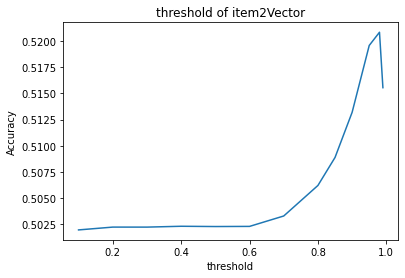

In [309]:
threshold_sim=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95,0.98,0.99]
acc_sim=[0.5019621,0.50223088,0.502230,0.502311,0.502285,0.502298,0.5032925,0.5062088,0.50888321,0.513197,0.519581,0.520844,0.51554898]
plt.plot(threshold_sim, acc_sim)
plt.xlabel('threshold')
plt.ylabel('Accuracy')
plt.title('threshold of item2Vector')
plt.savefig('iitem2Vector1.png',dpi=400,bbox_inches='tight')

In [161]:
simlist[:10]

[0.9997645,
 0.8757596,
 0.7985915,
 0.84262073,
 0.9949723,
 0.9657191,
 0.9679038,
 0.7430007,
 0.99815416,
 0.9286532]

In [ ]:
for l in open('validation.txt'):
        if l.startswith("reviewerID"):continue
        user,item,labels = l.strip().split(',')
        y_valid=eval(labels)
        u_g=user+ '-' +item
        X_valid.append(u_g)
        model.wv.similar_by_word(str().decode('utf-8'), topn =100)
        if item in return2:
            predictions[u_g]=1
        else:
            predictions[u_g]=0  
        y_pred=predictions[u_g]
        if y_valid==y_pred:
            acc+=1
    valid_len=len(X_valid)
    accuracy=acc/valid_len
    accuracy_all.append(accuracy)
accuracy_all